0     1.10
1     2.15
2     7.42
4     1.20
5     1.85
7     0.54
8     0.86
11    0.72
13    0.82
26    3.00
27    0.50
28    2.80
29    0.10
30    0.50
31    0.23
36    1.00
40    0.22
50    0.40
51    0.50
52    1.80
57    0.10
58    0.10
64    1.00
Name: bikedistance, dtype: float64
Street with longest bike trail/lane:  Beechwood Ave
Top 10 streets with longest bike trails/lanes:  ['Wightman Ave', 'Riverview Dr', 'Resevoir Dr', 'Penn Ave', 'Liberty Ave', 'Greenfield Rd', 'East Liberty Blvd', 'Birmingham Bridge', 'Beechwood Ave', 'Beacon Ave']


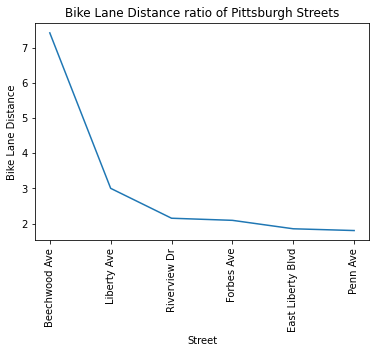

In [28]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

b = pd.read_csv("biking.csv")

b_mask = b.query('Type == "Bike Lane"').copy() #apply mask
biketrails = {}
toptrails = {}
top10streetslist = []
top10 = {}
# print(b_mask)


# trails = biking['Street'].value_counts().rename_axis("trail").to_frame(name='bikedistance')
# print(trails)
s = b_mask.bikedistance.apply(pd.to_numeric)
s = s.dropna()
print(s)


for i, row in b.iterrows():
    streetname = b['Street'].loc[b.index[i]]
    bikedist = b['bikedistance'].loc[b.index[i]]
    biketrails.update({streetname : bikedist})
    

top10 = dict(sorted(biketrails.items(), key= lambda kv: kv[1], reverse=True))

# toptrails = dict(sorted(biketrails, key= lambda kv: kv[1], reverse=True))
top10trails = dict(list(top10.items())[0: 10])
# top10 = dict(sorted(top10trails.items(),key= lambda kv: kv[1], reverse=True))
# print(top10)
# m = s.max()

topstreet = b['Street'].loc[b.index[2]]
print("Street with longest bike trail/lane: ", topstreet)

# Printing top 10 streets
for idx, row in b.iterrows():
    top10streets = b['Street'].loc[b.index[idx]]
    top10streetslist.append(top10streets)
    if idx == 9:
        break;
top10streetslist.sort(reverse=True)
print("Top 10 streets with longest bike trails/lanes: ", top10streetslist)


# Plot dictionary
def plotDict(dict_name):
    myList = dict_name.items()
#     print(myList)
    x, y = zip(*myList)
    plt.plot(x, y)
    plt.xlabel('Street')
    plt.ylabel('Bike Lane Distance')
    plt.title('Bike Lane Distance ratio of Pittsburgh Streets')
    plt.xticks(rotation=90)
    plt.show()
    
plotDict(top10trails)